In [186]:
import os
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [187]:
window_size = 1000
dataset_chosen = "AedesSex"
detectors = ["CDT", "IBDD", "IKS"]

In [188]:
dataset_test = pd.read_csv(f"datasets/test/{dataset_chosen}.test.csv")

In [189]:
proportions = []
detector_info = {k:0 for k in detectors}

In [190]:
def plot_accuracy(classification:list, final_acc:list):
    for i in range(0, len(classification), window_size):
        mean_acc = np.mean(classification[i:i+window_size])
        final_acc.append(mean_acc)
    
    return final_acc

In [191]:
def plot_proportions(proportions:list, final_prop):
    for i in range(0, len(proportions), window_size):
        mean_prop = np.mean(proportions[i:i+window_size])
        final_prop.append(mean_prop)
    
    return final_prop

CDT -> [251, 2025, 2783]
IBDD -> [571, 1895, 2061, 3204]
IKS -> [2281, 2466, 2650, 2817, 2983]


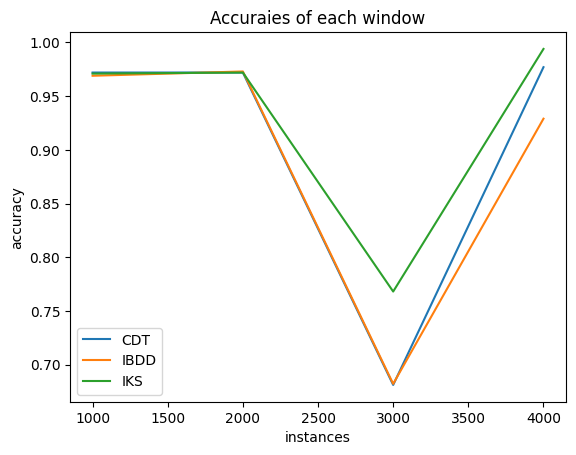

In [192]:
for file in os.listdir(f"results/"):
    dataset, detector = file.split("_")
    if dataset == dataset_chosen:
        with open(f"results/{file}", "r") as f:
            d = json.load(f)
            if isinstance(d, dict):
                drifts_detected, drifts_detected_at, time, context_portion, classification = d.values()
                print(f"{detector.split('.')[0]} -> {drifts_detected_at}")
                final_acc = plot_accuracy(classification, [])
                plt.plot(np.arange(int(window_size), len(dataset_test)+1, int(window_size)), final_acc, label=detector.split('.')[0])
                detector_info[detector.split(".")[0]] = final_acc
                
            else:
                proportions = d
                final_prop = plot_proportions(proportions, [])
plt.title("Accuraies of each window")
plt.xlabel("instances")
plt.ylabel("accuracy")
plt.legend()
plt.show()
    
    

In [193]:
df = pd.DataFrame(detector_info)
df

,CDT,IBDD,IKS
0,0.972,0.969,0.971
1,0.972,0.973,0.972
2,0.681,0.682,0.768
3,0.977,0.929,0.994


C:\Users\Luiz Fernando\AppData\Local\Temp\ipykernel_12428\3041463230.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  prop.set_xticklabels(np.arange(int(window_size/2), len(dataset_test), int(window_size/2)))


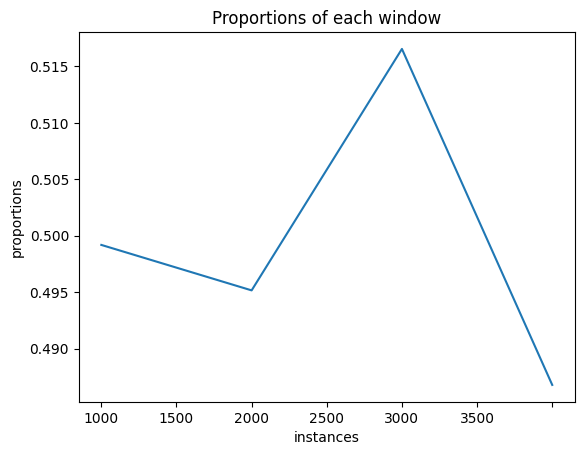

In [194]:
prop = sns.lineplot(final_prop)
prop.set_title("Proportions of each window")
prop.set_xlabel("instances")
prop.set_ylabel("proportions")
prop.set_xticklabels(np.arange(int(window_size/2), len(dataset_test), int(window_size/2)))
plt.show()